In [34]:
# A python notebook for analyzing the results from the data experiments

import numpy as np
OUTPUT_LOC = "E:\\Downloads\\out_by_income_new\\out_by_income_new\\"

lamb_list = 10 ** np.linspace(-2, 2, 16)
gamma_list = 10 ** np.linspace(-2, 2, 16)
lr_list = np.array([1e-4, 1e-3, 1e-2])

import glob
out_file_list = glob.glob(OUTPUT_LOC + "*.npy")
out_args_list = [
    f[len(OUTPUT_LOC):].split(".")[0].split("_")[2:] for f in out_file_list
]

def find_nearest(v, a):
    # find the value in a that is closest to v
    nearest_idx = np.nanargmin(np.abs(a - v))
    return a[nearest_idx], nearest_idx

def match_args(arg_list):
    # input a list of arguments in strings and match them to the actual value
    raw_lamb = float(arg_list[0].replace("dot", "."))
    raw_gamma = float(arg_list[1].replace("dot", "."))
    num_iter_used = int(arg_list[2])
    lr_used = float(arg_list[3].replace("dot", "."))
    p_used = float(arg_list[4].replace("dot", "."))
    lamb_used, _ = find_nearest(raw_lamb, lamb_list)
    gamma_used, _ = find_nearest(raw_gamma, gamma_list)
    return (lamb_used, gamma_used, num_iter_used, lr_used, p_used)


In [35]:
avg_cc = np.zeros(len(out_file_list))
min_cc = np.zeros(len(out_file_list))
max_cc = np.zeros(len(out_file_list))
avg_acc = np.zeros(len(out_file_list))
min_acc = np.zeros(len(out_file_list))
max_acc = np.zeros(len(out_file_list))
for i in range(len(out_file_list)):
    f = out_file_list[i]
    used_args = match_args(out_args_list[i])
    res_array = np.load(f)
    res_array[np.isnan(res_array)] = 6
    avg_cc[i] = np.mean(res_array[0, :])
    min_cc[i] = np.min(res_array[0, :])
    max_cc[i] = np.max(res_array[0, :])
    avg_acc[i] = np.mean(res_array[3, :])
    min_acc[i] = np.min(res_array[3, :])
    max_acc[i] = np.max(res_array[3, :])

In [36]:
avg_global_cc = np.zeros(len(out_file_list))
min_global_cc = np.zeros(len(out_file_list))
max_global_cc = np.zeros(len(out_file_list))
avg_global_acc = np.zeros(len(out_file_list))
min_global_acc = np.zeros(len(out_file_list))
max_global_acc = np.zeros(len(out_file_list))

for i in range(len(out_file_list)):
    f = out_file_list[i]
    used_args = match_args(out_args_list[i])
    res_array = np.load(f)
    res_array[np.isnan(res_array)] = 6
    avg_global_cc[i] = np.mean(res_array[2, :])
    min_global_cc[i] = np.min(res_array[2, :])
    max_global_cc[i] = np.max(res_array[2, :])
    avg_global_acc[i] = np.mean(res_array[5, :])
    min_global_acc[i] = np.min(res_array[5, :])
    max_global_acc[i] = np.max(res_array[5, :])

(0.01, 1.3593563908785256, 5000, 0.01, 0.1)


Text(0.5, 1.0, 'Cross Entropy at Each Zip Code (Personalized)')

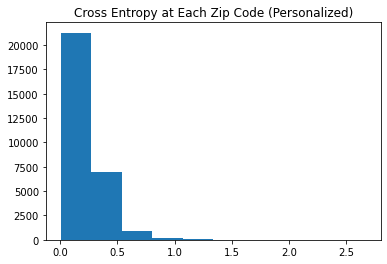

In [37]:
best_avg_cc = np.argmin(avg_cc)
print(match_args(out_args_list[best_avg_cc]))
best_res = np.load(out_file_list[best_avg_cc])
best_res[np.isnan(best_res)] = 6
best_res = best_res.clip(0, 6)

import matplotlib.pyplot as plt
plt.hist((best_res[0, :]))
plt.title('Cross Entropy at Each Zip Code (Personalized)')

Text(0.5, 1.0, 'Cross Entropy at Each Zip Code (Local)')

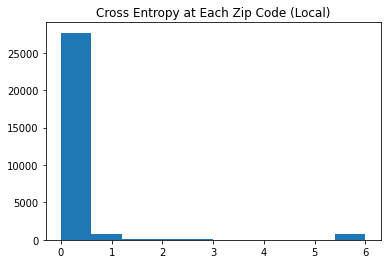

In [38]:
plt.hist((best_res[1, :]))
plt.title('Cross Entropy at Each Zip Code (Local)')


Text(0.5, 1.0, 'Cross Entropy at Each Zip Code (Global)')

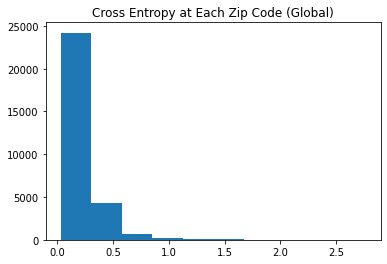

In [39]:
plt.hist((best_res[2, :]))
plt.title('Cross Entropy at Each Zip Code (Global)')


In [42]:
np.sum(best_res[3, :] >= best_res[5, :]) / 29490

0.9856900644286198

In [33]:
np.average(best_res[4, :])

0.9399062968484858

(array([2.8348e+04, 2.5900e+02, 8.3000e+01, 4.0000e+01, 2.2000e+01,
        1.1000e+01, 5.9600e+02, 7.0000e+00, 6.0000e+00, 1.1800e+02]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

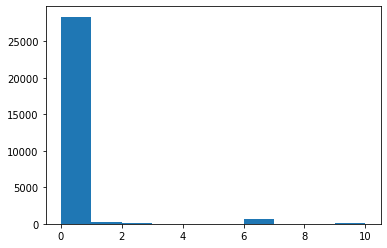

In [23]:
best_res[1, :] = np.nan_to_num(best_res[1, :], nan=6)
best_res[1, :] = np.clip(best_res[1, :], a_min=0, a_max=10)
plt.hist((best_res[1, :]))
plt.title('Cross Entropy at Each Zip Code (Local)')

In [22]:
best_res[1, :].max()

1.7976931348623157e+308

Text(0.5, 1.0, 'Cross Entropy at Each Zip Code (All Data)')

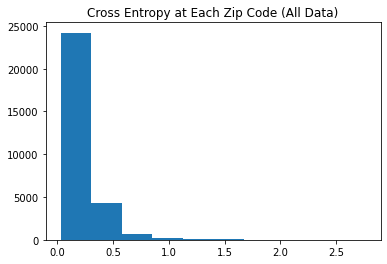

In [43]:
plt.hist((best_res[2, :]))
plt.title('Cross Entropy at Each Zip Code (All Data)')

In [60]:
print(np.mean(best_res[3, :]), np.median(best_res[3, :]), np.std(best_res[3, :]), np.quantile(best_res[3, :], (0.25, 0.5, 0.75)))

0.9424040253903495 0.9484536082474226 0.06610569873681721 [0.92063492 0.94845361 1.        ]


In [59]:
print(np.mean(best_res[4, :]), np.median(best_res[4, :]), np.std(best_res[4, :]), np.quantile(best_res[4, :], (0.25, 0.5, 0.75)))

0.9399062968484858 0.9473684210526315 0.06986614823140541 [0.91913909 0.94736842 1.        ]


In [58]:
print(np.mean(best_res[5, :]), np.median(best_res[5, :]), np.std(best_res[5, :]), np.quantile(best_res[5, :], (0.25, 0.5, 0.75)))

0.9422644487178691 0.9484749260819851 0.06698326968625469 [0.92085289 0.94847493 1.        ]


In [49]:
print(np.max(best_res, axis=1))

[2.66768742 6.         2.76027742 1.         1.         1.        ]


In [63]:
print(np.mean(best_res[3, :] >= best_res[4, :]))

0.9717192268565615


In [54]:
print(np.sum(best_res > 0.9, axis = 1))

[  247  1205   247 24872 24628 24873]


In [55]:
best_res.shape

(6, 29490)